In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [62]:
theta_0 = np.pi / 2 
theta_prime_0 = 0
L = 1  # m
g = 9.8  # m/s^2
T = 2 * np.pi * np.sqrt(L/g)
omega = g/L

In [63]:
def dy_dt(initial, t, delta):
    y1, y2 = initial    
    return [y2, - omega**2 * np.sin(y1) * (1 - delta * np.abs(np.sin(y1)))]

In [64]:
t_start = 0
t_end = 4
n = 10000
t = np.linspace(t_start, t_end, n)

y0 = [theta_0, theta_prime_0]
delta = 0

sol = odeint(dy_dt, y0, t, args=(delta,))

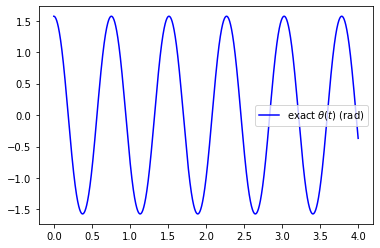

In [48]:
plt.plot(t, sol[:, 0], 'b', label='$\mathrm{exact}\ \\theta (t)\ (\mathrm{rad})$')

plt.legend()
plt.show()

In [49]:
from scipy.signal import find_peaks

In [103]:
npar = 1000
par = np.linspace(1e-4,np.pi, npar)
for i in range(npar):
    y0 = [par[i], theta_prime_0]
    sol = odeint(dy_dt, y0, t, args=(delta,))
    x = sol[:, 0]
    peaks, _ = find_peaks(x, height=0)
    try:
        period = t[peaks][1] - t[peaks][0]
        err = abs(((T - period) / T))
        if err <= 0.01:
            print(f"Period is {period}s at {par[i]}rad, err: {err}")
            break
    except IndexError:
        pass  # no peaks

Period is 1.998999899989999s at 3.0818445450630603rad, err: 0.004030722824704906


In [ ]:
deltas = list(range(-10,10))
deltas = np.linspace(0,1,10)
periods = []
for delt in deltas:
    sol = odeint(dy_dt, y0, t, args=(delt,))
    x = sol[:, 0]
    peaks, _ = find_peaks(x, height=0)
    try:
        period = t[peaks][1] - t[peaks][0]
    except IndexError:
        period = t[peaks][0]
    periods.append(period)
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")
    plt.show()

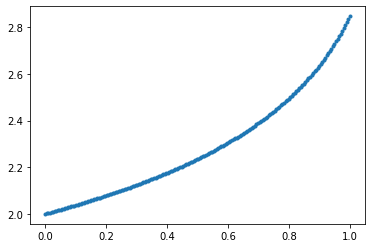

In [147]:
plt.plot(deltas, periods, '.')
plt.show()